A file to compare the parameters of the fitted functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import matplotlib.transforms as transforms
import matplotlib
import pandas as pd
import os
import os.path
from scipy import stats
import rpy2
import pingouin as pg

In [3]:
dname = os.getcwd()
dname

'c:\\Users\\Jirko\\Desktop\\Hip_Lab\\analysis_scripts\\part_level_analysis'

function to load the params

In [4]:
def load_parameters(function, levels_list, n_params):

     all_popt = np.full((49,n_params, len(levels_list)), np.nan)

     # loop over each level in the hierarchy
     for j, level in enumerate(levels_list):
          print(level)
          # load the model params for each participant
          df = pd.read_csv(dname + "/params_trialwise/" + level + "/" + function + ".csv")
          # convert to a numpy array
          all_popt[:,:,j] = df.to_numpy()[:,1:]

     return all_popt
               

load data for the sigmoid

In [54]:
levels_list = ["first", "second", "third"]
all_popt = load_parameters("sigmoid", levels_list, 2)
np.set_printoptions(suppress=True)
all_popt[:,1,:]

first
second
third


array([[ 0.16313757,  0.01419942,  0.00428915],
       [ 0.0589399 ,  0.05259373,  0.06015026],
       [ 0.31622844,  0.01335061,  8.19469091],
       [ 0.36777479,  0.0273126 ,  0.01651874],
       [ 0.07297063,  0.00806406,  0.01239857],
       [ 0.56075114,  0.01709113,  0.00800739],
       [22.41925197, 18.95729278, -0.00175428],
       [ 0.05525069,  0.04876343,  0.06339958],
       [ 0.84881293,  0.00426701,  0.00356616],
       [ 0.05319436,  0.05241972,  0.1168471 ],
       [ 0.00122941, -0.0050139 ,  0.00891045],
       [19.96004609,  9.35180579,  0.06137927],
       [ 0.02771156,  0.00981549,  0.01278051],
       [20.29441186,  0.00278962, -0.00364497],
       [20.14691063,  0.01346834,  0.00668531],
       [ 0.20133064,  0.20361201,  0.08450377],
       [ 0.08910803,  0.04672859,  0.72841137],
       [ 0.1117511 , 20.07174176,  8.87025709],
       [17.29777779,  0.00830623, -0.00028974],
       [ 9.8239217 , -0.0061689 , -0.0167701 ],
       [ 9.88007994,  0.30766782,  0.194

boxplot code

In [115]:
# code for plotting our histograms

def plot_boxplot(data, labels, title, file_name):

    # code for hist from
    fig, ax = plt.subplots(1, 1, figsize=(7, 5), dpi=300, facecolor='w')

    # make data all in one plot
    print(np.mean(data, axis=0))
    print(np.std(data, axis=0))
    bplot = ax.boxplot(data,
                vert=True,  # vertical box alignment
                patch_artist=True,  # fill with color
                labels=labels)  # will be used to label x-ticks)

    # Hide the right and top spines
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)

    # set the title
    ax.set_title(title, fontsize=14)

    # make the x and y labels
    ax.set_xlabel('Hierarchical Level', fontsize=11)
    ax.set_ylabel('Parameter $b_2$', fontsize=11)

    # fill with colors
    colors = [plt.cm.viridis(.8), plt.cm.viridis(.6), plt.cm.viridis(.4), plt.cm.viridis(.2)]
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

    plt.savefig(os.getcwd() + file_name)
    plt.show()

[0.94170648 1.6184415  1.88646605]
[0.94140828 1.52874206 1.6352775 ]


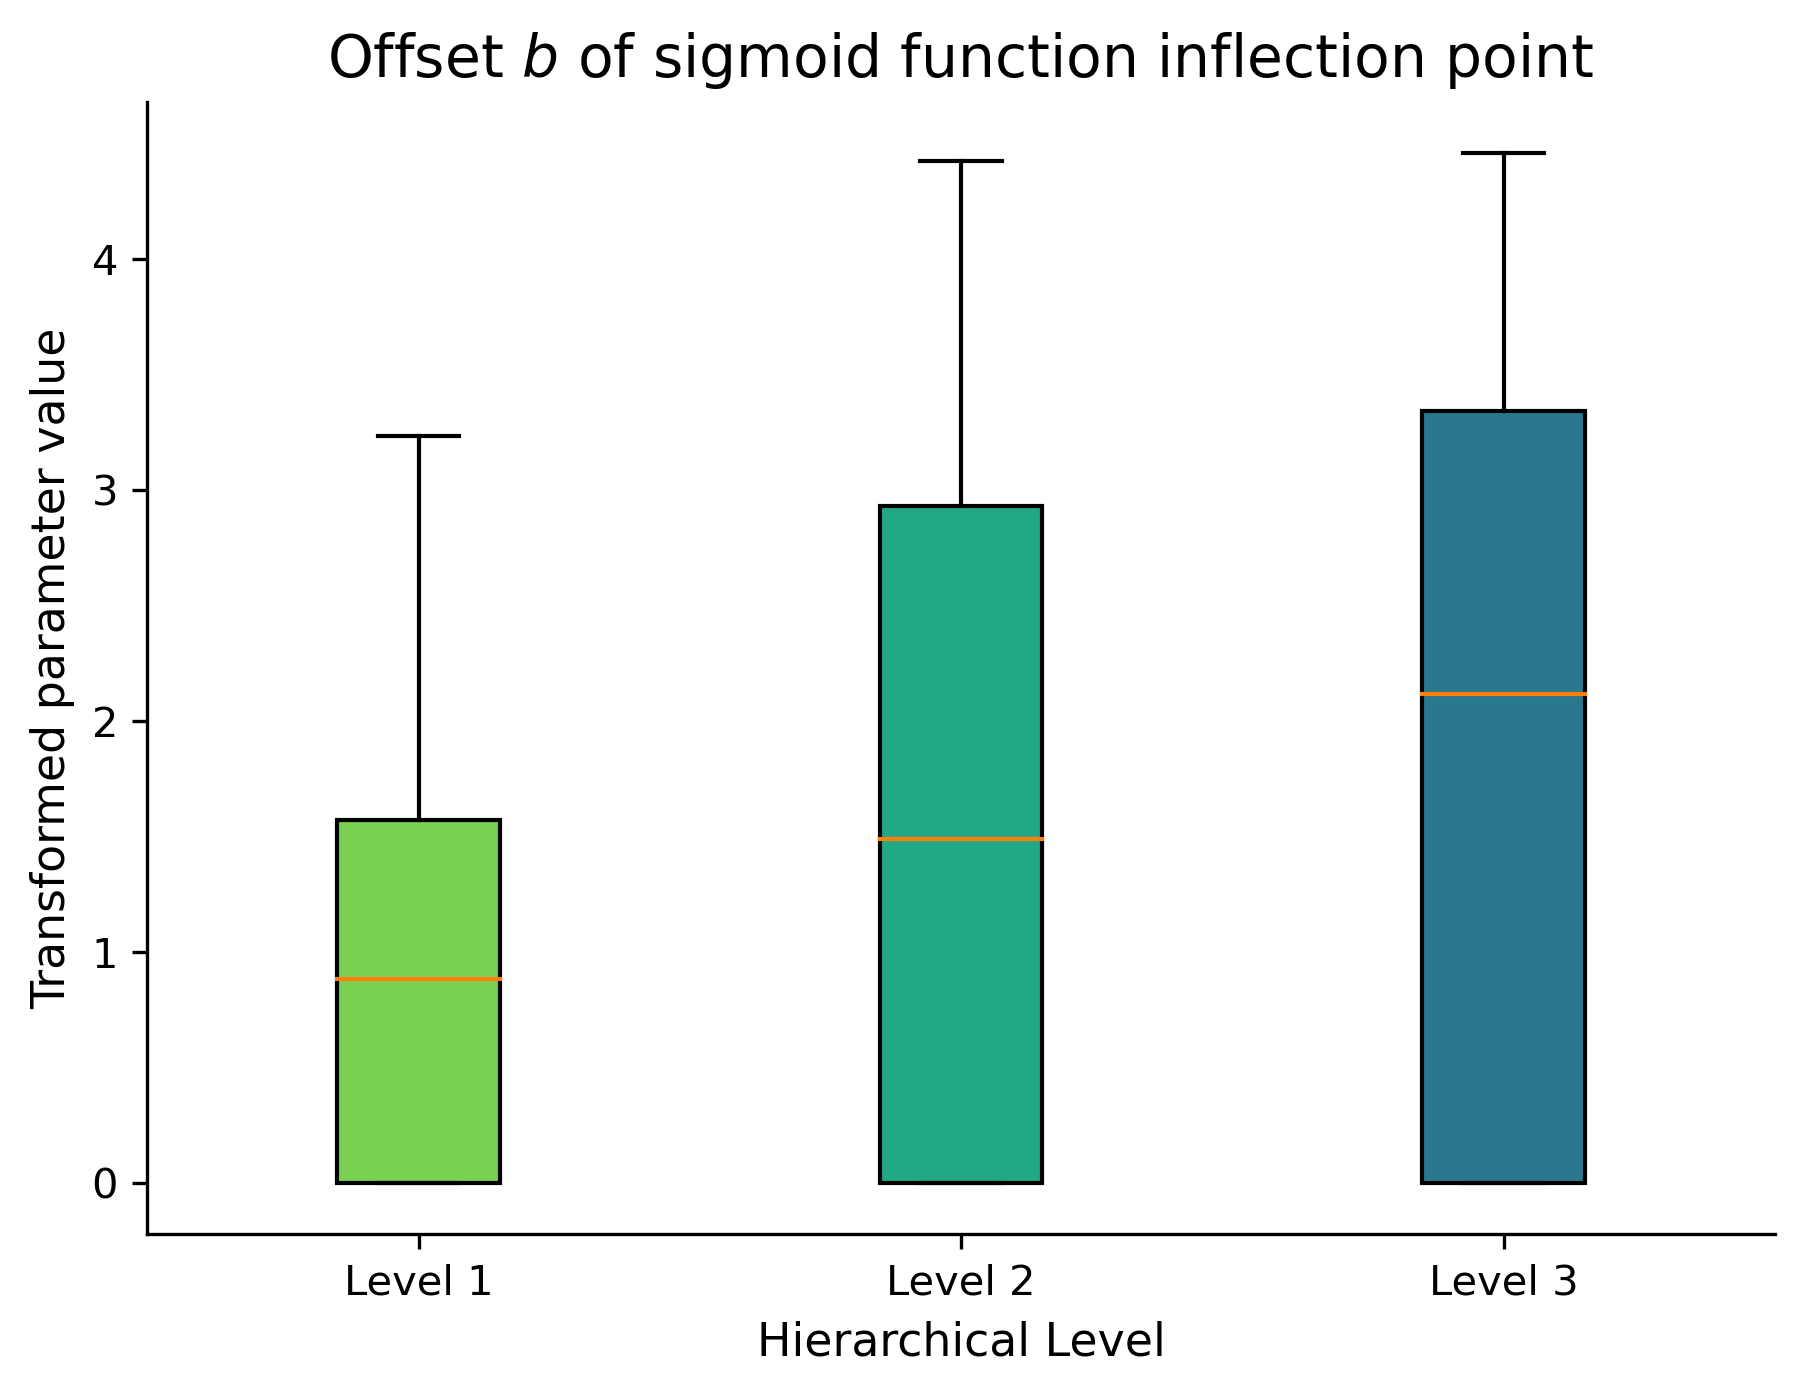

In [82]:
labels = ["Level 1","Level 2","Level 3"]
# file_name = "/figures_parameters/sigmoid_off.png"
file_name = "/figures_parameters/sigmoid_slope.png"
# title = 'Slope of sigmoid function $k$'
title = 'Offset $b$ of sigmoid function inflection point'
# apply transform
min = np.min(all_popt[:,1,:], axis=0)
data_offset = np.log(all_popt[:,0,:])
data_slope = np.log(all_popt[:,1,:] + 1 - min)
# np.min(data, axis=0)
plot_boxplot(data_offset, labels, title, file_name)

In [35]:
dname2 = os.path.dirname(os.getcwd()) + '/data_loading/data_v2_quotes/'
acc_first_prop = np.load(dname2 + 'Acc_first_prop_New.npy')
acc_second_prop = np.load(dname2 + 'acc_second_prop_New.npy')
acc_third_prop = np.load(dname2 + 'acc_third_prop_New.npy')
acc_first_prop_reshaped = np.reshape(acc_first_prop,(49,128))
acc_second_prop_reshaped = np.reshape(acc_second_prop,(49,128))
acc_third_prop_reshaped = np.reshape(acc_third_prop,(49,128))

def sigmoid(x, x0, k):
    y = 1 / (1 + np.exp(-k*(x-x0)))
    return y

[-120. -119. -118. -117. -116. -115. -114. -113. -112. -111. -110. -109.
 -108. -107. -106. -105. -104. -103. -102. -101. -100.  -99.  -98.  -97.
  -96.  -95.  -94.  -93.  -92.  -91.  -90.  -89.  -88.  -87.  -86.  -85.
  -84.  -83.  -82.  -81.  -80.  -79.  -78.  -77.  -76.  -75.  -74.  -73.
  -72.  -71.  -70.  -69.  -68.  -67.  -66.  -65.  -64.  -63.  -62.  -61.
  -60.  -59.  -58.  -57.  -56.  -55.  -54.  -53.  -52.  -51.  -50.  -49.
  -48.  -47.  -46.  -45.  -44.  -43.  -42.  -41.  -40.  -39.  -38.  -37.
  -36.  -35.  -34.  -33.  -32.  -31.  -30.  -29.  -28.  -27.  -26.  -25.
  -24.  -23.  -22.  -21.  -20.  -19.  -18.  -17.  -16.  -15.  -14.  -13.
  -12.  -11.  -10.   -9.   -8.   -7.   -6.   -5.   -4.   -3.   -2.   -1.
    0.    1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.
   12.   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.
   24.   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.
   36.   37.   38.   39.   40.   41.   42.   43.   

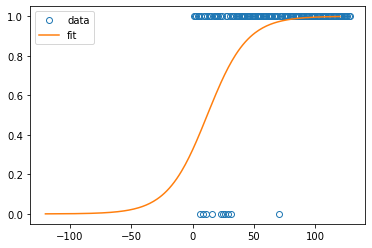

In [42]:
y_data = acc_second_prop_reshaped[11,:]
x_data = np.linspace(1, acc_first_prop_reshaped.shape[1], acc_first_prop_reshaped.shape[1])

x = np.linspace(-120, 120, 241)
print(x)
y = sigmoid(x, *all_popt[11,:,2])
plt.plot(x_data, y_data, label='data', linestyle='', marker = 'o', mfc = 'none')
plt.plot(x,y, label='fit')
plt.legend()    

load data for step-function

In [103]:
levels_list = ["first", "second", "third"]
all_popt_step = load_parameters("linear_step_2", levels_list, 2)
np.set_printoptions(suppress=True)

first
second
third


array([[  0.        ,  15.8974359 ],
       [  0.        ,  39.42418426],
       [  0.        ,   8.15999999],
       [  0.        ,   7.77777776],
       [  0.        ,  41.35590204],
       [  0.        ,  11.76744124],
       [  6.06440847,   6.76862287],
       [  0.        ,  59.85507227],
       [  0.00000012,   4.99999986],
       [  0.        ,  30.40192929],
       [  0.        , 128.        ],
       [  0.        ,   6.49999989],
       [  0.        ,  74.5806277 ],
       [  0.        ,  33.05804683],
       [  0.        ,  16.08602147],
       [  0.        ,  13.20967742],
       [  0.        ,  22.06395351],
       [  0.        ,  11.24444442],
       [  0.        ,  96.25192793],
       [  0.        ,  16.80898878],
       [  0.        ,   0.67393921],
       [  2.60096457,   1.03787702],
       [  0.        ,  41.28422873],
       [  1.07612103,   1.96991334],
       [  0.        ,  96.25192797],
       [  0.        ,   9.49999998],
       [  0.        ,  20.21126762],
 

In [105]:
# calculate the differences between the two parameters
differences = np.array([all_popt_step[:,0,i] - all_popt_step[:,1,i] for i in range(all_popt_step.shape[2])])
differences = differences.T
distance = np.absolute(differences)
distance.shape

(49, 3)

Now we plot the distances of the constant sections in our step functions

[26.32964399 72.40376257 81.991582  ]
[29.7880081  44.17058467 47.16589229]


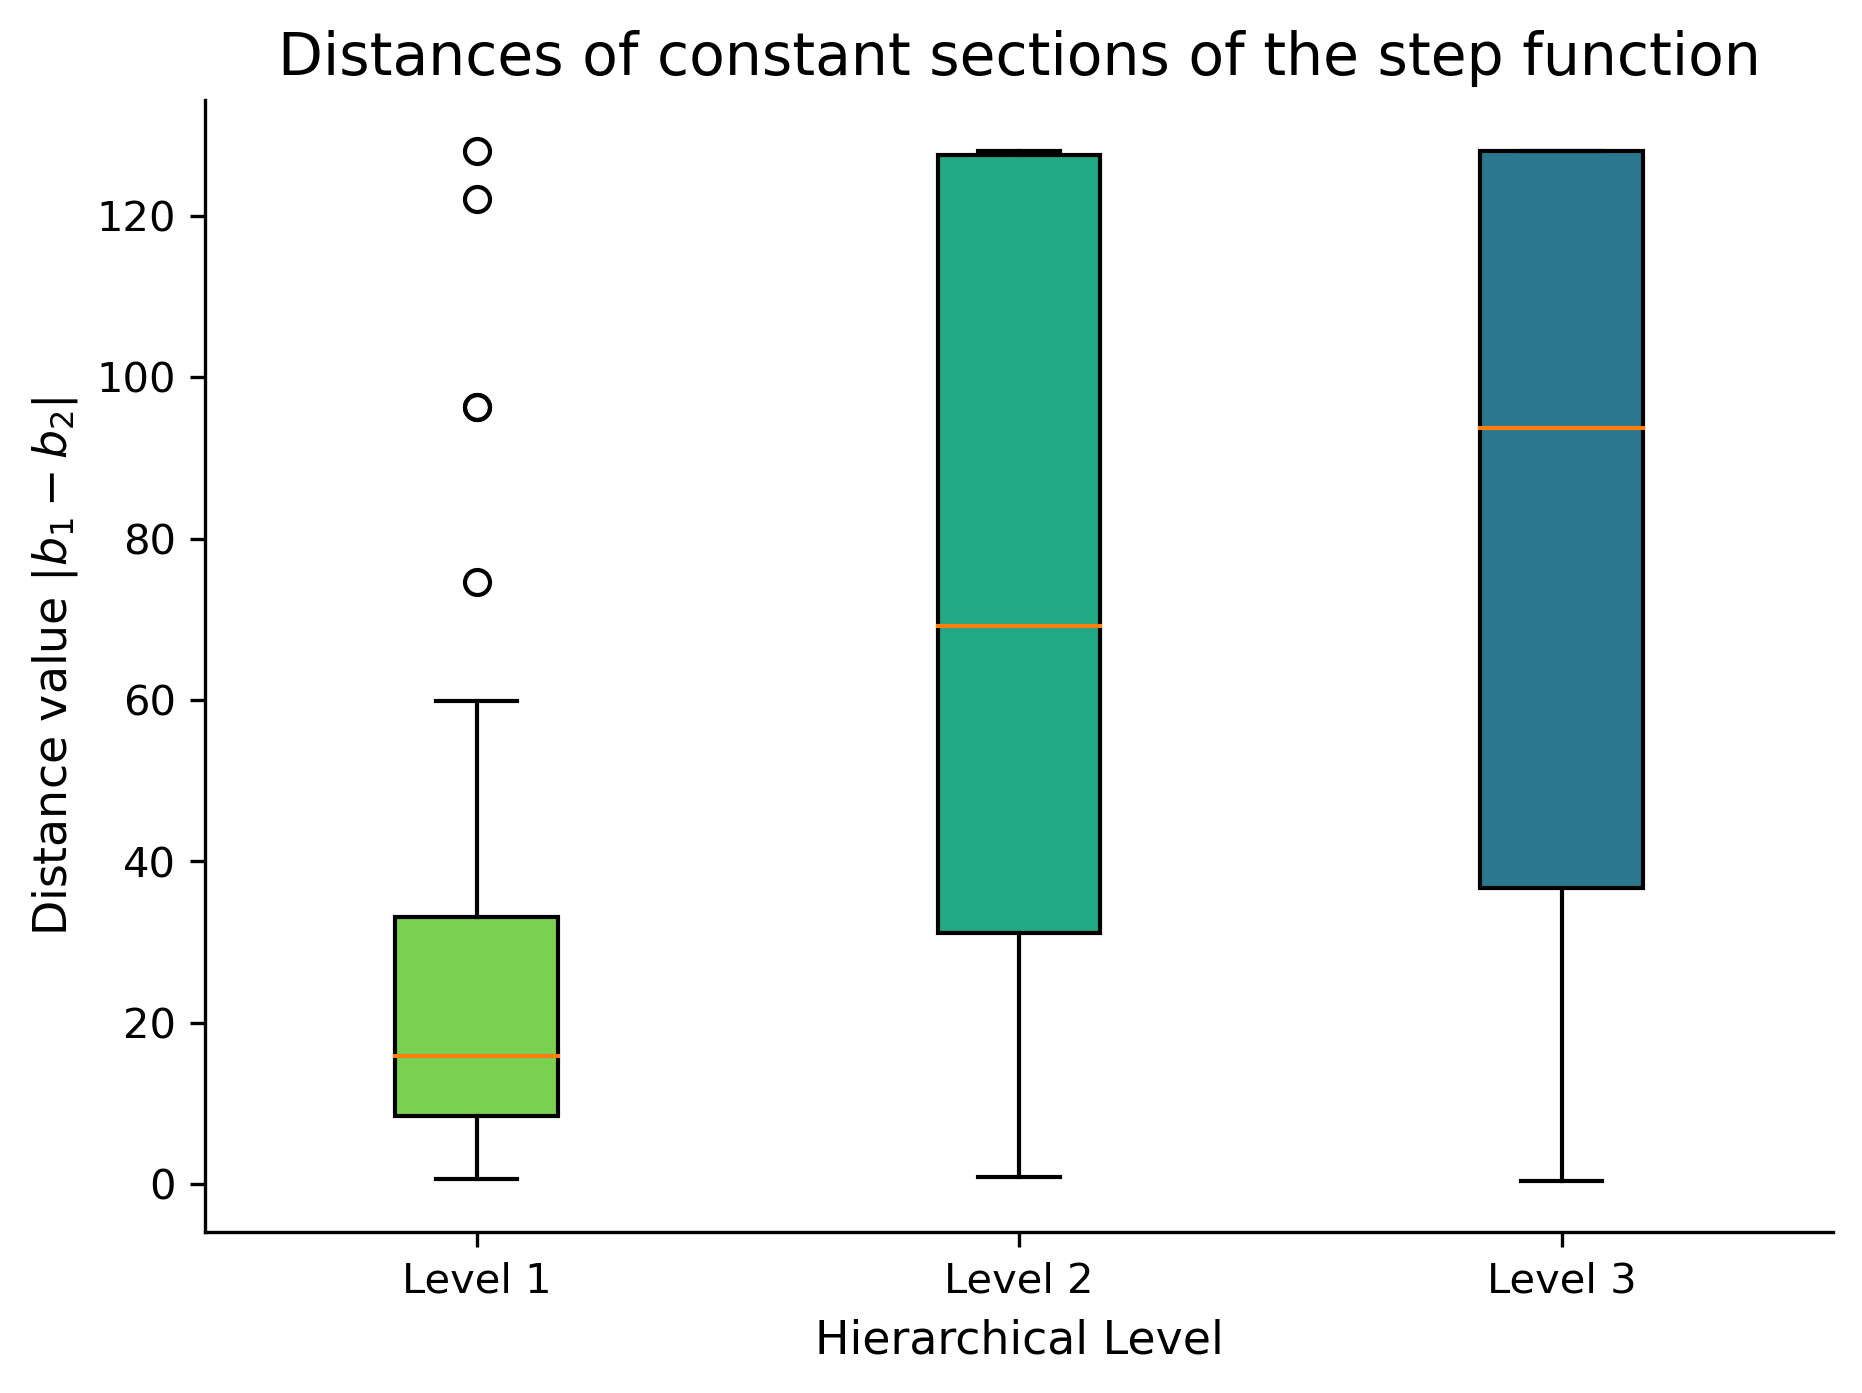

In [111]:
labels = ["Level 1","Level 2","Level 3"]
file_name = "/figures_parameters/step_func_distance.png"
title = 'Distances of constant sections of the step function'
plot_boxplot(distance, labels, title, file_name)

[26.5973499  77.60391897 93.29209249]
[29.61635786 45.322445   46.02640415]


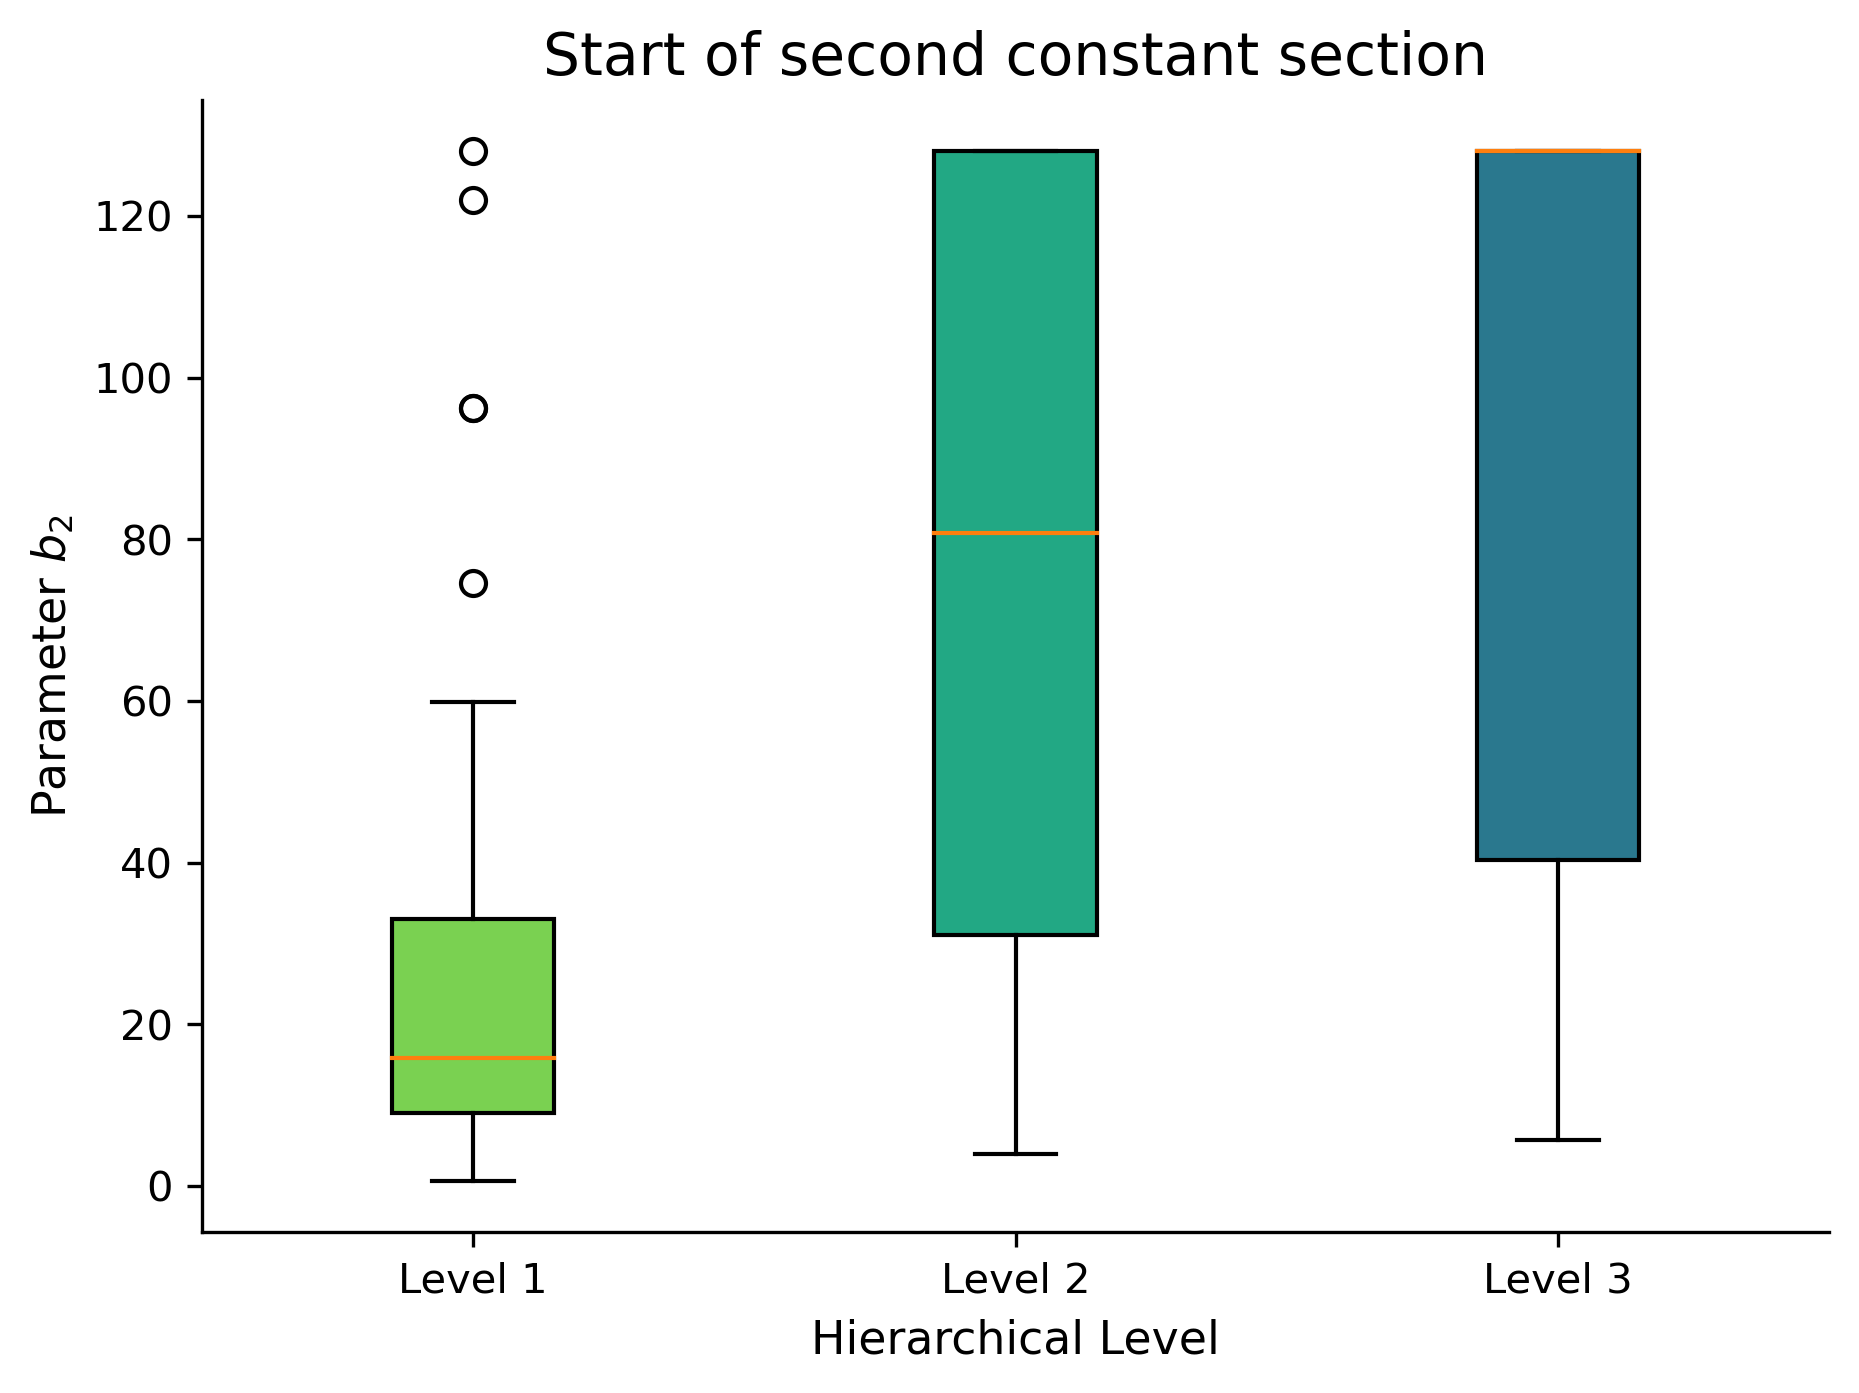

In [117]:
labels = ["Level 1","Level 2","Level 3"]
# file_name = "/figures_parameters/sigmoid_off.png"
file_name = "/figures_parameters/step_func_b_2.png"
# title = 'Slope of sigmoid function $k$'
title = 'Start of second constant section'
plot_boxplot(all_popt_step[:,1,:], labels, title, file_name)

In [84]:
def linear_step_func(x, x0, x1):
    y= np.piecewise(x, [
        x < x0, 
       (x >= x0) & (x <= x1), 
        x > x1],
            [0., 
            lambda x: x/(x1-x0)+x0/(x0-x1),
            1.])
    return y

[-120. -119. -118. -117. -116. -115. -114. -113. -112. -111. -110. -109.
 -108. -107. -106. -105. -104. -103. -102. -101. -100.  -99.  -98.  -97.
  -96.  -95.  -94.  -93.  -92.  -91.  -90.  -89.  -88.  -87.  -86.  -85.
  -84.  -83.  -82.  -81.  -80.  -79.  -78.  -77.  -76.  -75.  -74.  -73.
  -72.  -71.  -70.  -69.  -68.  -67.  -66.  -65.  -64.  -63.  -62.  -61.
  -60.  -59.  -58.  -57.  -56.  -55.  -54.  -53.  -52.  -51.  -50.  -49.
  -48.  -47.  -46.  -45.  -44.  -43.  -42.  -41.  -40.  -39.  -38.  -37.
  -36.  -35.  -34.  -33.  -32.  -31.  -30.  -29.  -28.  -27.  -26.  -25.
  -24.  -23.  -22.  -21.  -20.  -19.  -18.  -17.  -16.  -15.  -14.  -13.
  -12.  -11.  -10.   -9.   -8.   -7.   -6.   -5.   -4.   -3.   -2.   -1.
    0.    1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.
   12.   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.
   24.   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.
   36.   37.   38.   39.   40.   41.   42.   43.   

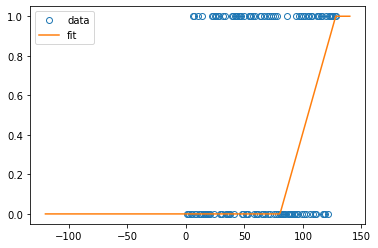

In [91]:
y_data = acc_third_prop_reshaped[10,:]
x_data = np.linspace(1, acc_first_prop_reshaped.shape[1], acc_first_prop_reshaped.shape[1])

x = np.linspace(-120, 140, 261)
print(x)
y = linear_step_func(x, *all_popt_step[10,:,2])
plt.plot(x_data, y_data, label='data', linestyle='', marker = 'o', mfc = 'none')
plt.plot(x,y, label='fit')
plt.legend()  